<a href="https://colab.research.google.com/github/KandamuruAdityamanoj/AI-ML-Internship-by-Tech-Mythree/blob/main/Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install scikit-learn

In [ ]:
pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/AI-ML Internship/Task 7/segmentation data.csv")

In [ ]:
# Perform EDA
print(data.head())
print(data.info())
print(data.describe())

          ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income          

In [ ]:
# Check for missing values
print(data.isnull().sum())

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64


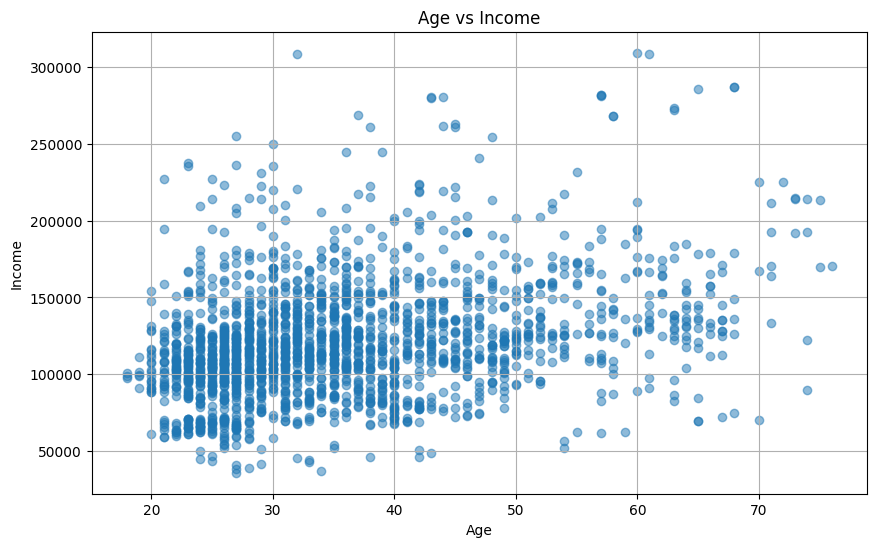

In [ ]:
# Visualize some features to understand the data distribution
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Income'], alpha=0.5)
plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(True)
plt.show()

In [ ]:
# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=['ID']))

In [ ]:
# Implementing K-Means and K-Medoids clustering
# Finding the optimal number of clusters (K) using the elbow method
wcss = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

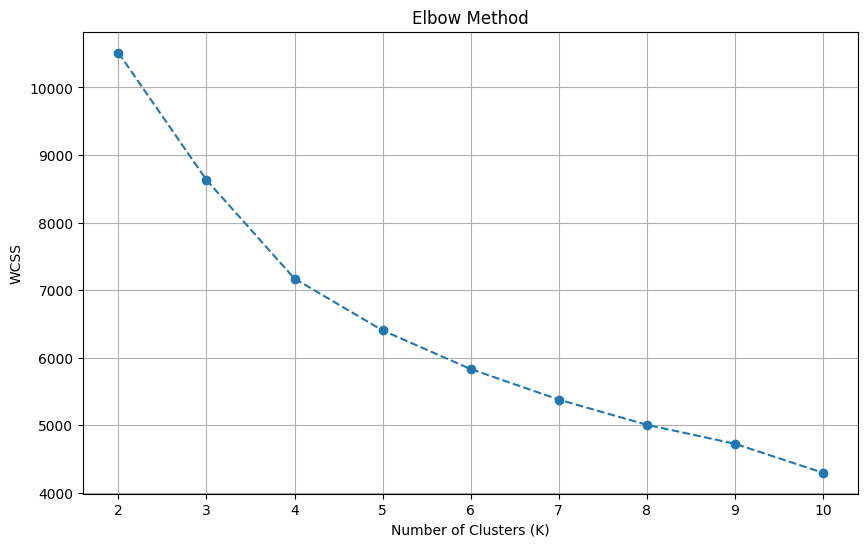

In [ ]:
# Plotting the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

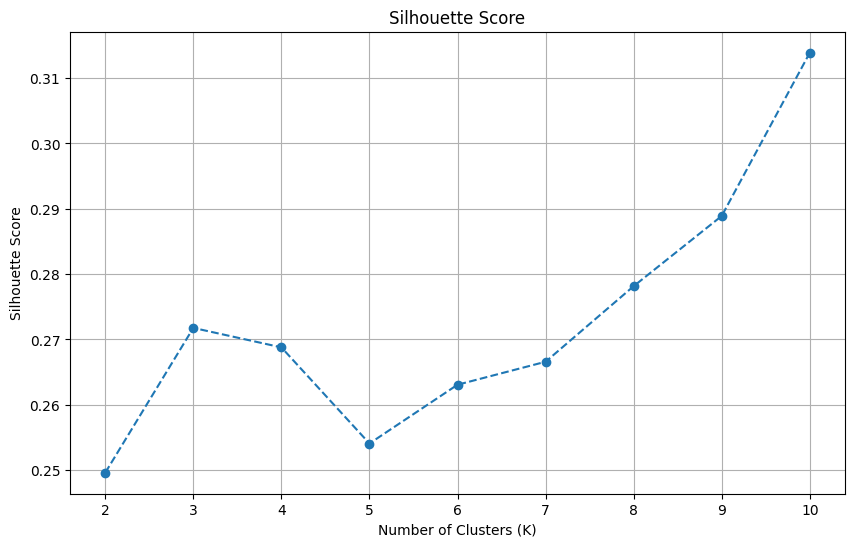

In [ ]:
# Plotting silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

In [ ]:
# Based on the elbow method, let's choose K=5
k = 5

In [ ]:
# Applying K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)
data['KMeans_Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Applying K-Medoids clustering
kmedoids = KMedoids(n_clusters=k, random_state=42)
kmedoids.fit(scaled_data)
data['KMedoids_Cluster'] = kmedoids.labels_

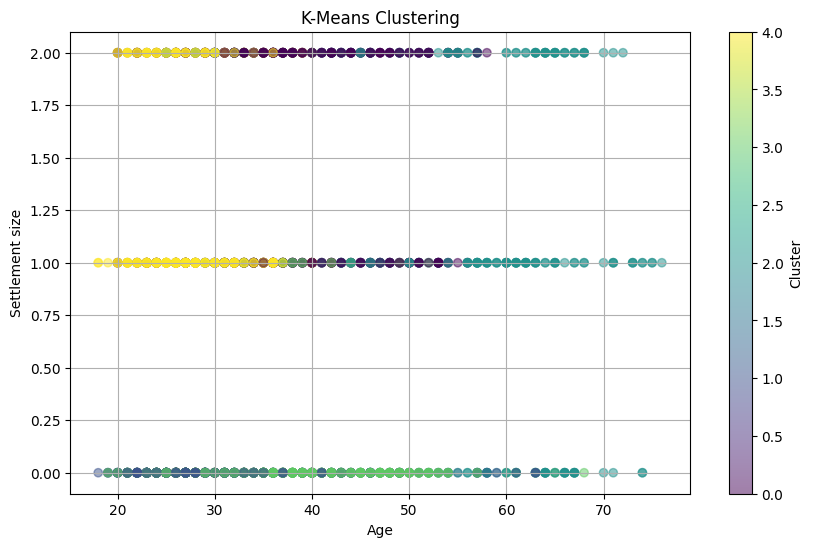

In [ ]:
# Visualizing the final clusters using two features
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Settlement size'], c=data['KMeans_Cluster'], cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Settlement size')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

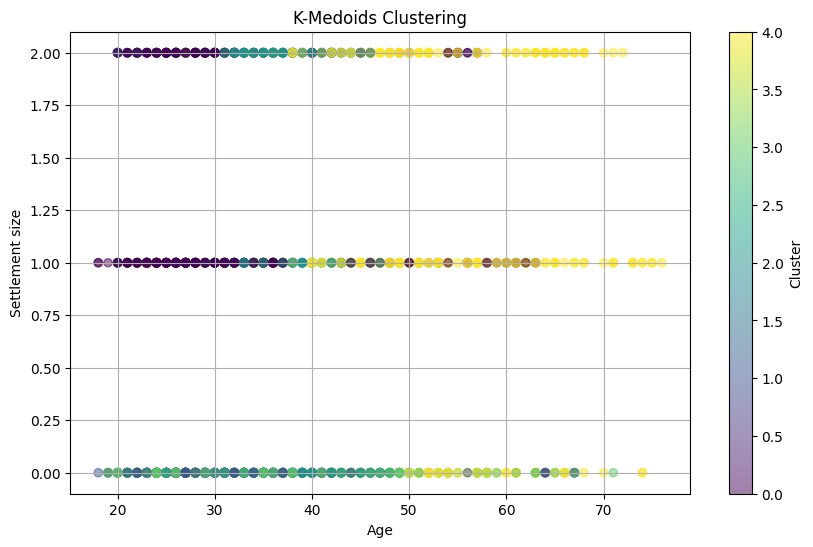

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Settlement size'], c=data['KMedoids_Cluster'], cmap='viridis', alpha=0.5)
plt.title('K-Medoids Clustering')
plt.xlabel('Age')
plt.ylabel('Settlement size')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()